In [1]:
import pandas as pd

# Read red wine CSV file
red_wine_file = 'winequality-red.csv'
red_data = pd.read_csv(red_wine_file,delimiter=';')
red_data['wine_type'] = 0  # Red wine

# Read white wine CSV file
white_wine_file = 'winequality-white.csv'
white_data = pd.read_csv(white_wine_file,delimiter=';')
white_data['wine_type'] = 1  # white wine

#Combine all data 
combined_data = pd.concat([red_data, white_data], axis=0)

In [2]:
#Preprocessing
# Remove Duplicates 
combined_data = combined_data.drop_duplicates()

In [3]:
#Preprocessing
# Check for null data
print(combined_data['wine_type'].isnull().sum())

0


In [4]:
#Preprocessing
# Separate features and labels
x = combined_data.drop(['wine_type'], axis=1)  # Features
y = combined_data['wine_type']  # Labels

In [6]:
#Preprocessing
# Normalize Data
from  sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [7]:
#split test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
# Model Selection
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier( n_neighbors= 5, leaf_size = 10)


In [9]:
# Training
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=10)

In [10]:
# Computational Times for Trainig
import time
start_time = time.time()
KNN_model.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training time: {training_time:.4f} seconds")

Training time: 0.0131 seconds


In [11]:
# prediction
y_predict_test = KNN_model.predict(X_test)

In [12]:
# Computational Times for Testing
start_time = time.time()
y_pred = KNN_model.predict(X_test)
testing_time = time.time() - start_time
print(f"Testing time: {testing_time:.4f} seconds")

Testing time: 0.0794 seconds


In [13]:
# mertics
from sklearn.metrics import confusion_matrix , precision_score , recall_score, accuracy_score

confusion_test  = confusion_matrix(y_test , y_predict_test)
precision_test  = precision_score (y_test , y_predict_test)
recall_test     = recall_score    (y_test , y_predict_test)
accuracy_test   = accuracy_score  (y_test , y_predict_test)

print ("confusion    :\n" , confusion_test ,
       "\n precision : "  , precision_test*100 ,"%",
       "\n recall    : "  , recall_test*100    ,"%",
       "\n accuracy  : "  ,accuracy_test*100   ,"%")


confusion    :
 [[288   1]
 [  7 768]] 
 precision :  99.8699609882965 % 
 recall    :  99.09677419354838 % 
 accuracy  :  99.24812030075188 %


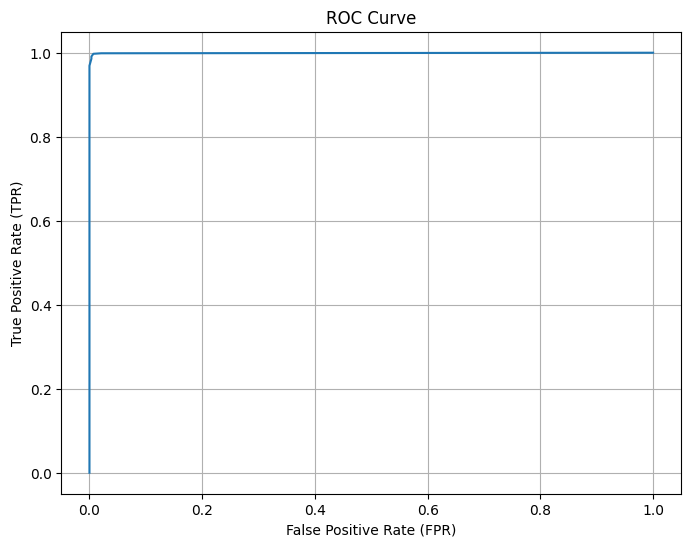

In [14]:
# ROC
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
y_prob = KNN_model.predict_proba(X_test)[:, 1]

# ROC Curve 
fpr, tpr, thresholds = roc_curve(y_test,y_prob )

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.grid()
plt.show()
